# Problem Statement

### The Anime Recommendation System project aims to analyze anime viewing patterns and user ratings to build a personalized recommendation engine. Using the Anime Recommendation Database 2020, which includes metadata of anime titles and millions of user ratings, the goal is to:

### 1. Identify the most popular and highly rated anime.

### 2. Understand user preferences and engagement.

### 3. Analyze the impact of attributes like genre, type, and episodes on ratings.

### 4. Provide recommendations based on user behavior and anime features.

In [1]:
# Loading Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load anime dataset and display first 5 rows
anime=pd.read_csv("anime.csv")
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
# Load rating dataset and display first 5 rows
rating=pd.read_csv("rating.csv")
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [4]:
# Examining randowm rows and at the end of the dataset
anime.sample(10)
anime.tail(5)

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [5]:
# Examining randowm rows and at the end of the dataset
rating.sample(10)
rating.tail(5)

,user_id,anime_id,rating
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9
7813736,73516,8074,9


In [6]:
# viewing the data
anime.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [7]:
# viewing the data
rating.columns

Index(['user_id', 'anime_id', 'rating'], dtype='object')

In [8]:
# Shape of the data
anime.shape

(12294, 7)

In [9]:
# Shape of the data
rating.shape

(7813737, 3)

In [10]:
# Information of the dataset
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [11]:
# Information of the dataset
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [12]:
# Data Statistics 
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [13]:
# Data Statistics 
rating.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [14]:
# Missing values of dataset
missing_values = anime.isnull().sum()
print(missing_values)

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [15]:
# Missing values of dataset
missing_values = rating.isnull().sum()
print(missing_values)

user_id     0
anime_id    0
rating      0
dtype: int64


In [16]:
# Examining the dataset for duplicaterows and dropping the duplicates
duplicate_rows= anime.duplicated().sum()
print(duplicate_rows)

0


In [17]:
# Examining the dataset for duplicaterows and dropping the duplicates
duplicate_rows= rating.duplicated().sum()
print(duplicate_rows)

1


In [18]:
anime.drop_duplicates()
rating.drop_duplicates()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [19]:
# 2. Handle missing values in anime.csv
# Fill missing ratings with average rating
anime['rating'] = anime['rating'].fillna(anime['rating'].mean())

In [20]:
# Replace missing or empty 'type' with 'Unknown'
anime['type'] = anime['type'].fillna('Unknown')
anime['type'] = anime['type'].replace('', 'Unknown')

In [21]:
# Replace missing or empty 'genre' with 'Unknown'
anime['genre'] = anime['genre'].fillna('Unknown')
anime['genre'] = anime['genre'].replace('', 'Unknown')

In [22]:
# 3. Handle missing values in ratings.csv
# Remove rows with NULL anime_id or user_id
rating = rating.dropna(subset=['anime_id', 'user_id'])

In [23]:
# Replace -1 ratings (watched but not rated) with NaN
rating['rating'] = rating['rating'].replace(-1, np.nan)

In [24]:
# NAN values check
print(anime.isna())
print(rating.isna())

       anime_id   name  genre   type  episodes  rating  members
0         False  False  False  False     False   False    False
1         False  False  False  False     False   False    False
2         False  False  False  False     False   False    False
3         False  False  False  False     False   False    False
4         False  False  False  False     False   False    False
...         ...    ...    ...    ...       ...     ...      ...
12289     False  False  False  False     False   False    False
12290     False  False  False  False     False   False    False
12291     False  False  False  False     False   False    False
12292     False  False  False  False     False   False    False
12293     False  False  False  False     False   False    False

[12294 rows x 7 columns]
         user_id  anime_id  rating
0          False     False    True
1          False     False    True
2          False     False    True
3          False     False    True
4          False     False    T

In [25]:
# infinity values check
a1=anime.isin([np.inf,-np.inf])
a2=rating.isin([np.inf,-np.inf])
print(a1)
print(a2)

       anime_id   name  genre   type  episodes  rating  members
0         False  False  False  False     False   False    False
1         False  False  False  False     False   False    False
2         False  False  False  False     False   False    False
3         False  False  False  False     False   False    False
4         False  False  False  False     False   False    False
...         ...    ...    ...    ...       ...     ...      ...
12289     False  False  False  False     False   False    False
12290     False  False  False  False     False   False    False
12291     False  False  False  False     False   False    False
12292     False  False  False  False     False   False    False
12293     False  False  False  False     False   False    False

[12294 rows x 7 columns]
         user_id  anime_id  rating
0          False     False   False
1          False     False   False
2          False     False   False
3          False     False   False
4          False     False   Fa

In [26]:
# 1. Top 10 most popular anime
top_popular = anime.sort_values(by='members', ascending=False).head(10)
print("Top 10 Most Popular Anime:")
print(top_popular[['name', 'members']])

Top 10 Most Popular Anime:
                                 name  members
40                         Death Note  1013917
86                 Shingeki no Kyojin   896229
804                  Sword Art Online   893100
1    Fullmetal Alchemist: Brotherhood   793665
159                      Angel Beats!   717796
19    Code Geass: Hangyaku no Lelouch   715151
841                            Naruto   683297
3                         Steins;Gate   673572
445                  Mirai Nikki (TV)   657190
131                         Toradora!   633817


In [27]:
# 2. Top 10 highest-rated anime
top_rated = anime[anime['rating'].notnull()].sort_values(by='rating', ascending=False).head(10)
print("Top 10 Highest-Rated Anime:")
print(top_rated[['name', 'rating']])

Top 10 Highest-Rated Anime:
                                          name  rating
10464  Taka no Tsume 8: Yoshida-kun no X-Files   10.00
10400              Spoon-hime no Swing Kitchen    9.60
9595                          Mogura no Motoro    9.50
0                               Kimi no Na wa.    9.37
9078                              Kahei no Umi    9.33
1             Fullmetal Alchemist: Brotherhood    9.26
10786          Yakusoku: Africa Mizu to Midori    9.25
2                                     Gintama°    9.25
3                                  Steins;Gate    9.17
4                                Gintama&#039;    9.16


In [28]:
# 3. Count of anime by type
anime_type_count = anime['type'].value_counts()
print("Anime Count by Type:")
print(anime_type_count)

Anime Count by Type:
type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Unknown      25
Name: count, dtype: int64


In [29]:
# 4. Top 10 most active users
active_users = rating.groupby('user_id').size().sort_values(ascending=False).head(10)
print("Top 10 Most Active Users:")
print(active_users)

Top 10 Most Active Users:
user_id
48766    10227
42635     3747
53698     2905
57620     2702
59643     2633
51693     2622
27364     2499
45659     2469
7345      2429
66021     2362
dtype: int64


In [30]:
# 5. Average rating per user
user_avg_rating = rating[rating['rating'] != -1].groupby('user_id')['rating'].mean().sort_values(ascending=False)
print("Average Rating per User:")
print(user_avg_rating.head(10))

Average Rating per User:
user_id
1        10.0
2        10.0
73496    10.0
18650    10.0
73405    10.0
73436    10.0
73445    10.0
18689    10.0
18697    10.0
18577    10.0
Name: rating, dtype: float64


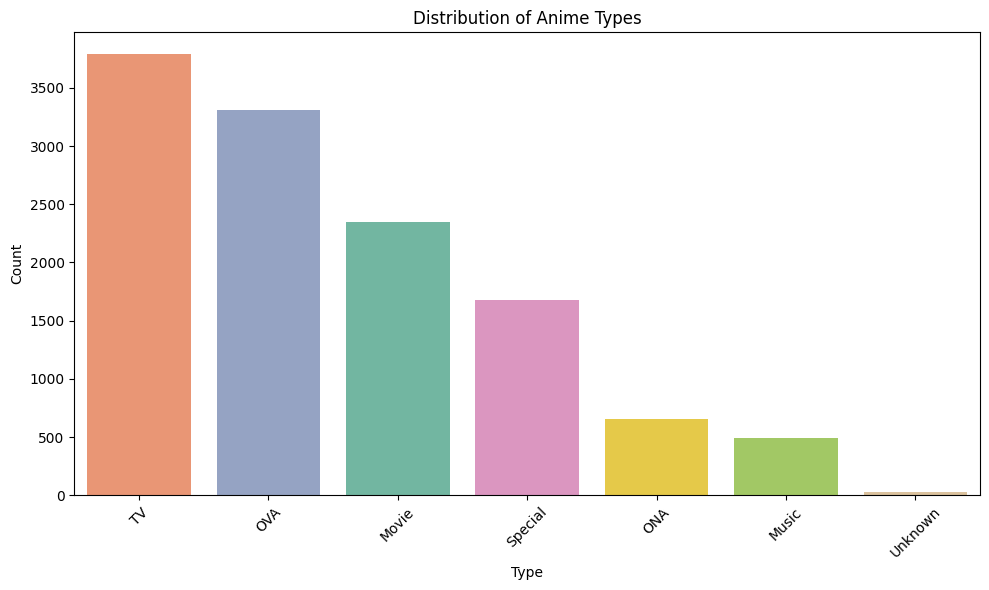

In [31]:
# 6. Distribution of Anime Types (TV, Movie, OVA, etc.)
plt.figure(figsize=(10,6))
sns.countplot(data=anime, x='type', hue='type', order=anime['type'].value_counts().index, palette='Set2', legend=False)
plt.title('Distribution of Anime Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

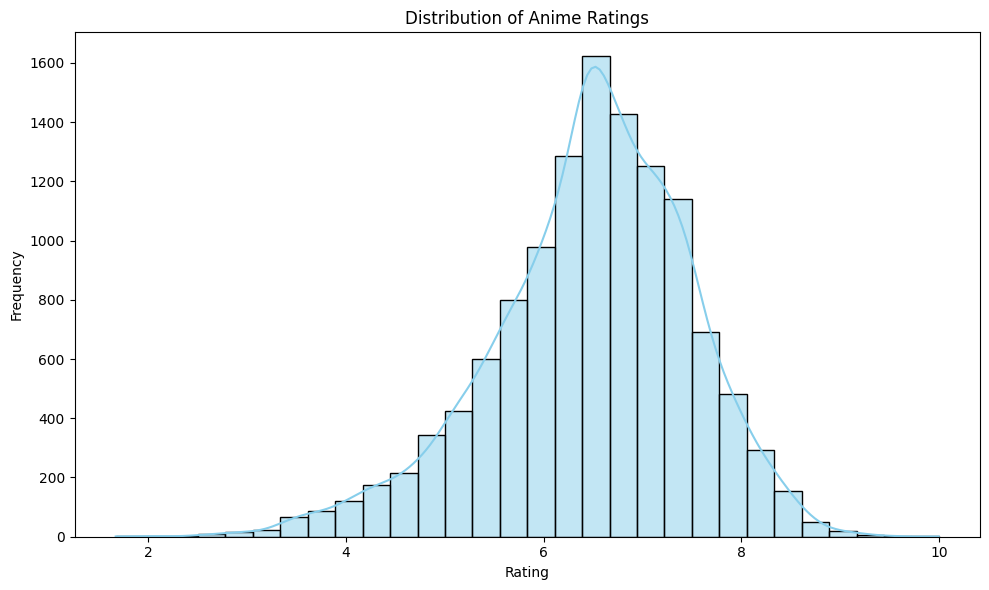

In [32]:
# 7. Distribution of Ratings
plt.figure(figsize=(10,6))
sns.histplot(anime['rating'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

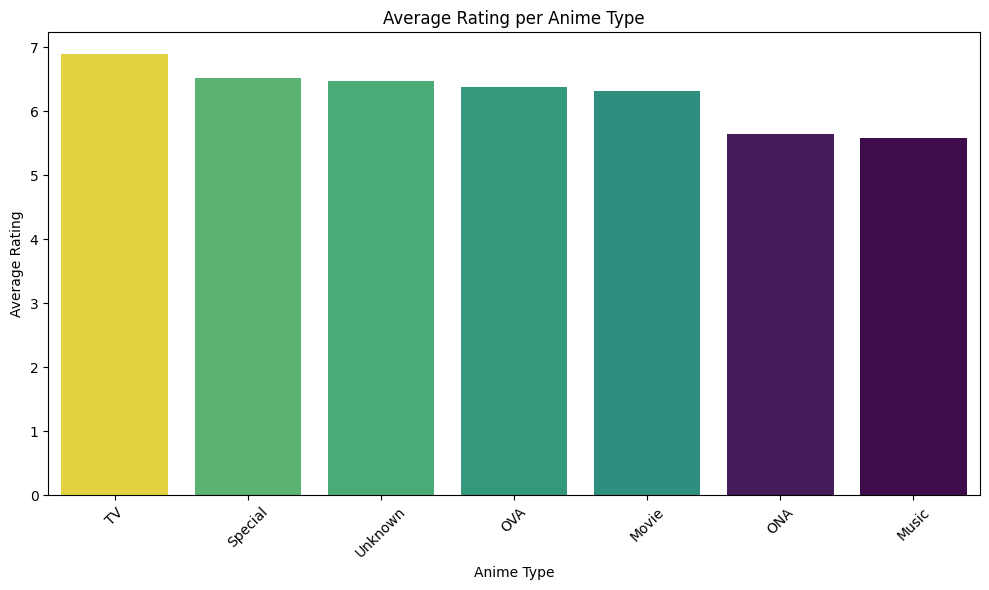

In [41]:
# 7. Average Rating per Anime Type
# Group and calculate mean rating
avg_rating_by_type = anime.groupby('type')['rating'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating_by_type.index, y=avg_rating_by_type.values, palette='viridis',hue=avg_rating_by_type.values,legend=False)
plt.title('Average Rating per Anime Type')
plt.xlabel('Anime Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

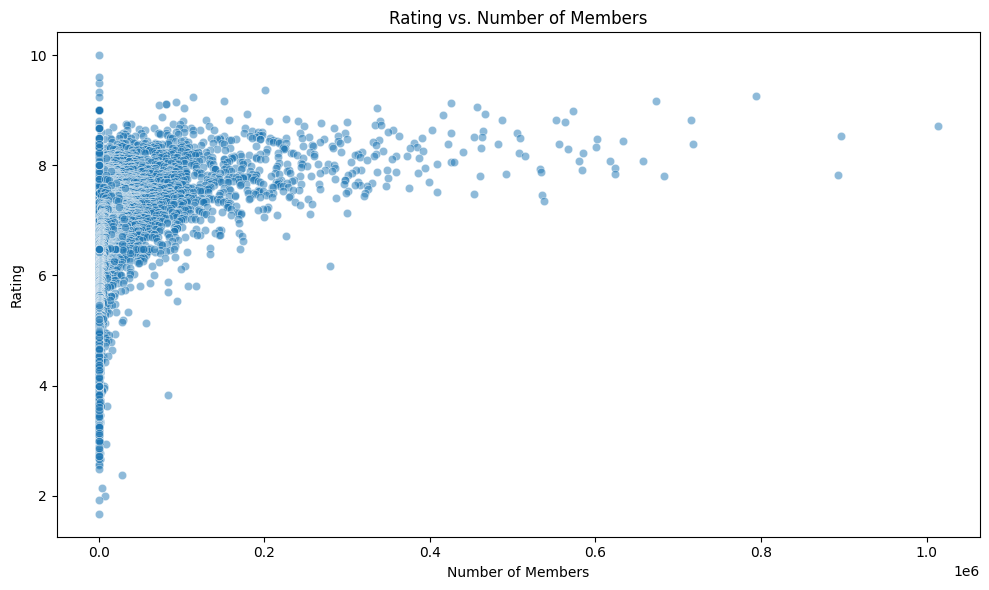

In [42]:
# 8. Members vs Rating (Popularity vs Quality)
plt.figure(figsize=(10,6))
sns.scatterplot(data=anime, x='members', y='rating', alpha=0.5)
plt.title('Rating vs. Number of Members')
plt.xlabel('Number of Members')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


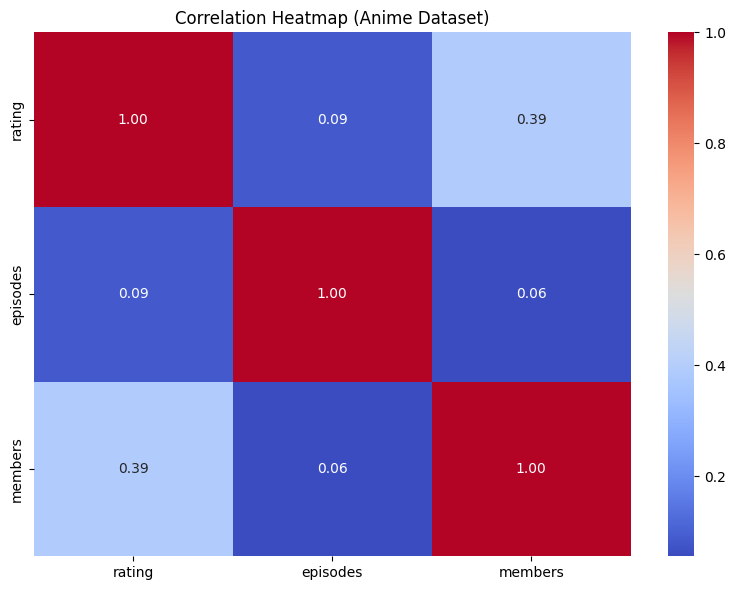

In [43]:
# 9. Correlation Heat Map
import numpy as np

# Convert episodes to numeric
anime['episodes'] = pd.to_numeric(anime['episodes'], errors='coerce')

# Select numeric columns for correlation
numeric_cols = anime[['rating', 'episodes', 'members']].dropna()

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Anime Dataset)')
plt.tight_layout()
plt.show()


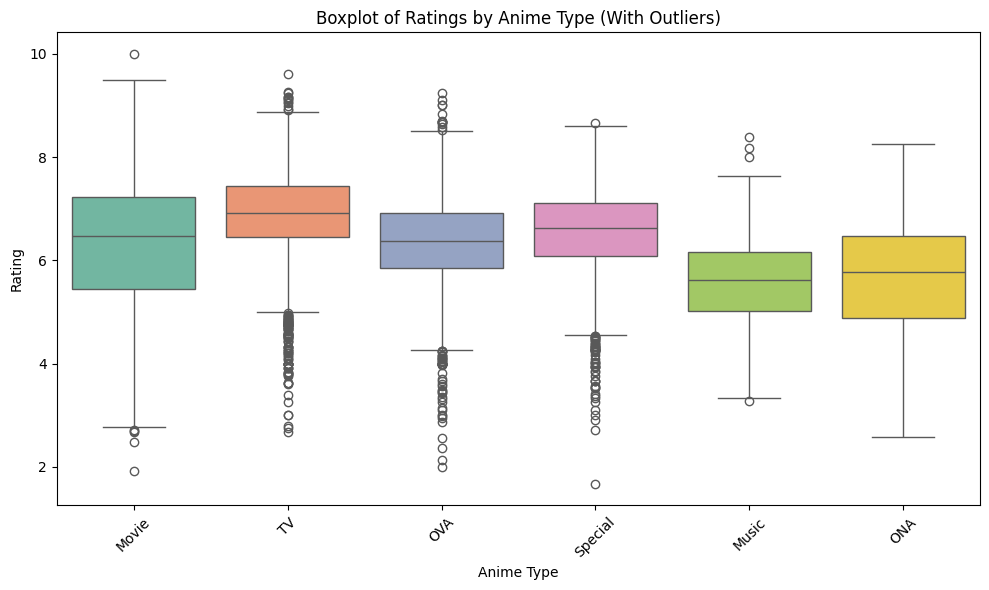

In [66]:
# 10. Box Plot of Ratings by Anime Type

# Drop missing values in 'rating' and 'type'
anime_clean = anime[anime['type'] != 'Unknown']

plt.figure(figsize=(10,6))
sns.boxplot(data=anime_clean, x='type', y='rating', palette='Set2',hue='type',legend=False)
plt.title('Boxplot of Ratings by Anime Type (With Outliers)')
plt.xlabel('Anime Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

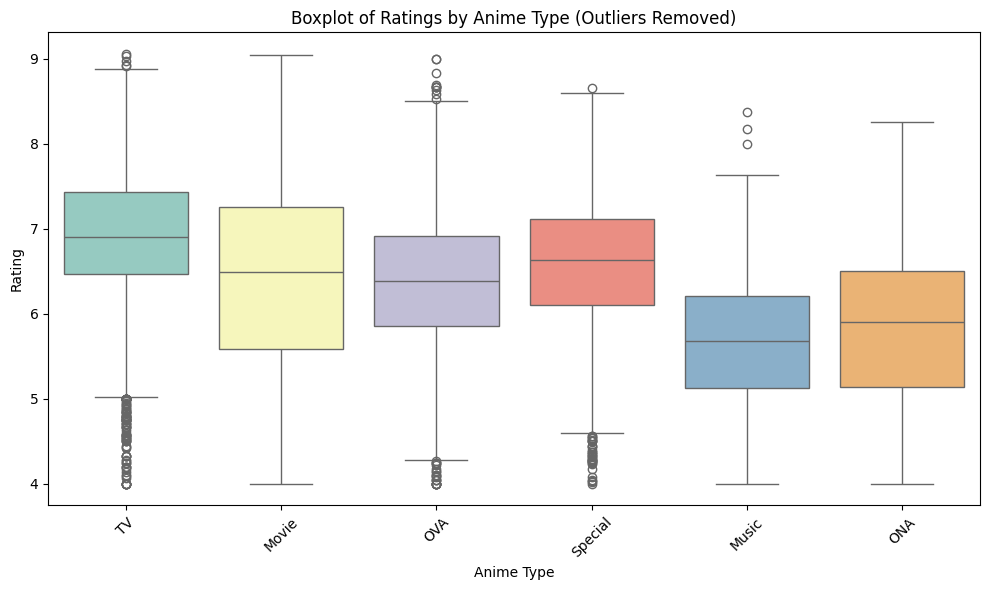

In [64]:
# 11. After removing outliers

# Drop missing values in 'rating' and 'type'
anime_clean = anime[anime['type'] != 'Unknown']

# Remove outliers using IQR
Q1 = anime_clean['rating'].quantile(0.25)
Q3 = anime_clean['rating'].quantile(0.75)
IQR = Q3 - Q1

# Filter ratings within 1.5*IQR
filtered = anime_clean[(anime_clean['rating'] >= Q1 - 1.5 * IQR) & (anime_clean['rating'] <= Q3 + 1.5 * IQR)]

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=filtered, x='type', y='rating', palette='Set3',hue='type',legend=False)
plt.title('Boxplot of Ratings by Anime Type (Outliers Removed)')
plt.xlabel('Anime Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


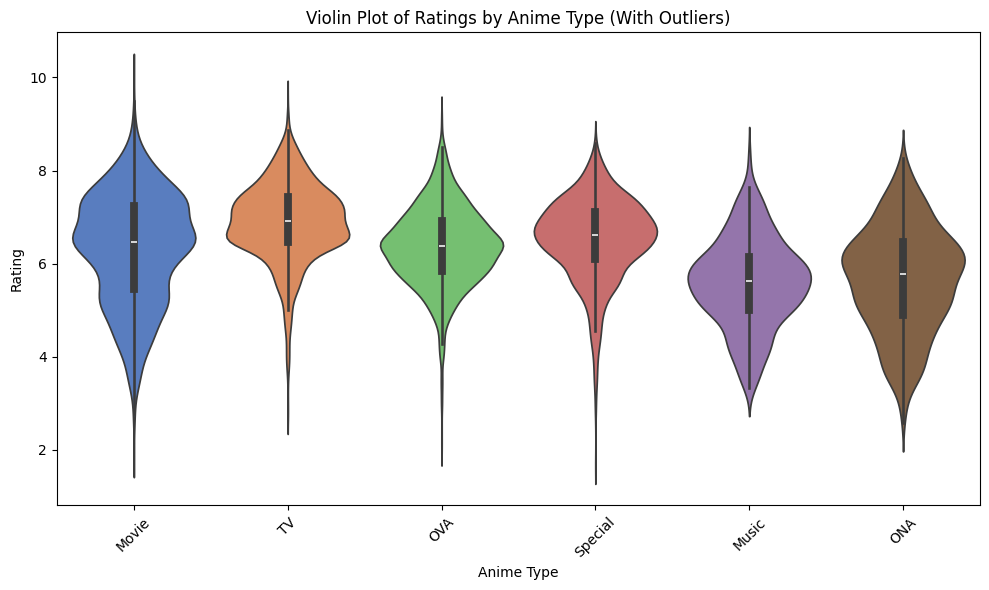

In [63]:
# 12. Violin Plot of Ratings by Anime Type (With Outliers)

# Drop missing values in 'rating' and 'type'
anime_clean = anime[anime['type'] != 'Unknown']

# Plot violin plot
plt.figure(figsize=(10,6))
sns.violinplot(data=anime_clean, x='type', y='rating', palette='muted',hue='type',legend=False)
plt.title('Violin Plot of Ratings by Anime Type (With Outliers)')
plt.xlabel('Anime Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


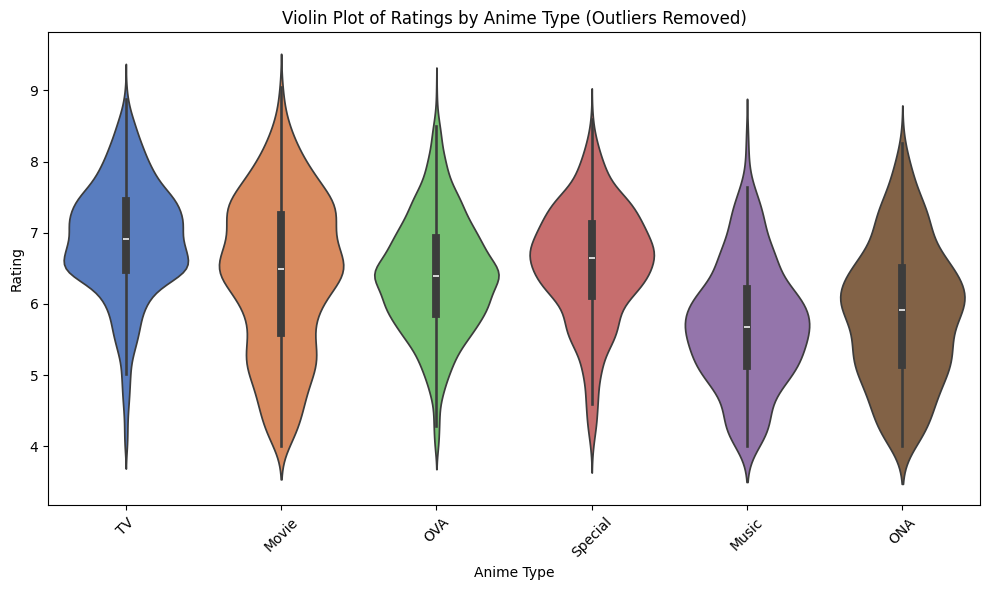

In [61]:
# removing outliers

# Drop missing values in 'rating' and 'type'
anime_clean = anime[anime['type'] != 'Unknown']
# Remove outliers using IQR
Q1 = anime_clean['rating'].quantile(0.25)
Q3 = anime_clean['rating'].quantile(0.75)
IQR = Q3 - Q1

filtered = anime_clean[(anime_clean['rating'] >= Q1 - 1.5 * IQR) & (anime_clean['rating'] <= Q3 + 1.5 * IQR)]

# Violin plot without outliers
plt.figure(figsize=(10,6))
sns.violinplot(data=filtered, x='type', y='rating', palette='muted',hue='type',legend=False)
plt.title('Violin Plot of Ratings by Anime Type (Outliers Removed)')
plt.xlabel('Anime Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


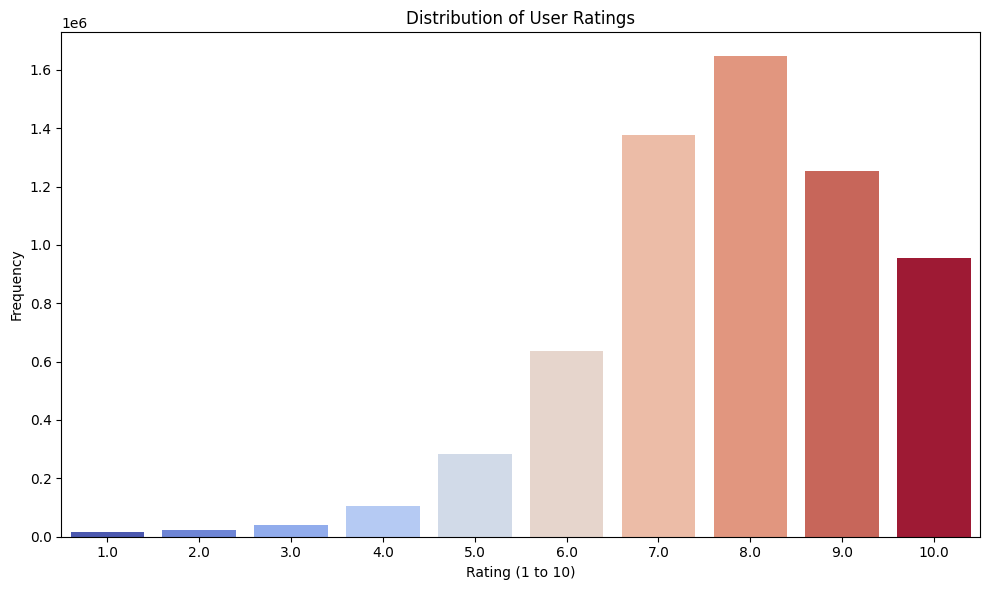

In [69]:
# 13. Distribution of User Ratings
# Remove -1 ratings (indicates user watched but did not rate)
ratings_clean = rating[rating['rating'] != -1]

plt.figure(figsize=(10,6))
sns.countplot(x='rating', data=ratings_clean, palette='coolwarm',hue='rating',legend=False)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating (1 to 10)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

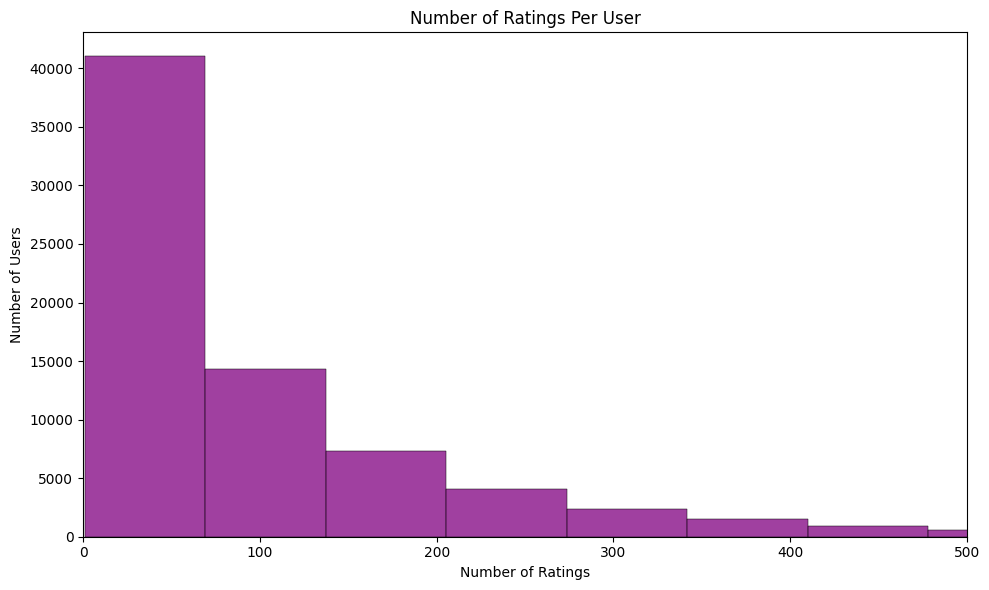

In [75]:
# 14. Number of Ratings Per User (User Activity)
user_counts = ratings_clean['user_id'].value_counts()

plt.figure(figsize=(10,6))
sns.histplot(user_counts, bins=150, kde=False, color='purple')
plt.title('Number of Ratings Per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.xlim(0, 500)  # Optional: limit for visibility
plt.tight_layout()
plt.show()


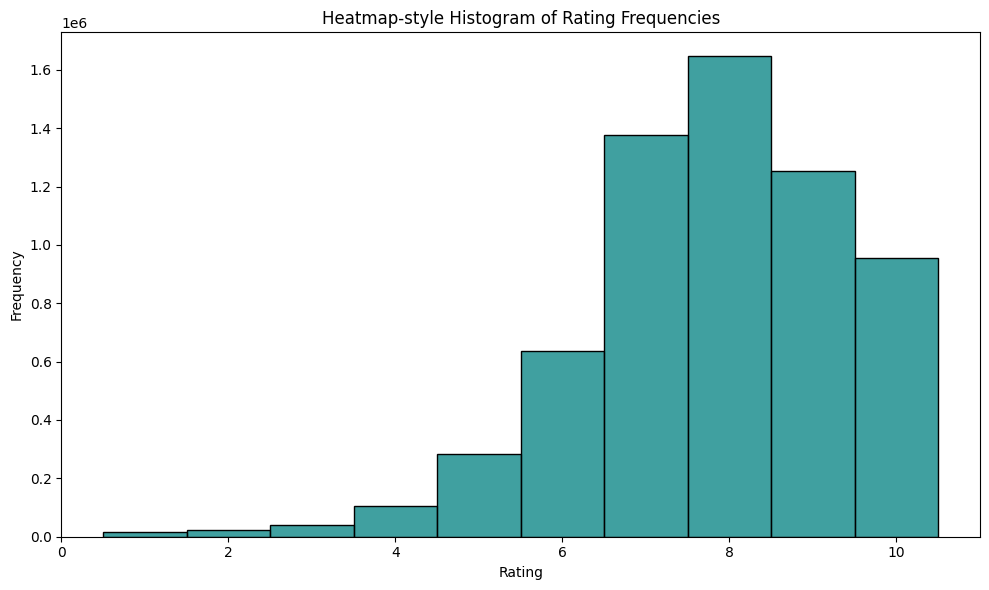

In [78]:
# 15. Histogram of Rating Frequency
plt.figure(figsize=(10,6))
sns.histplot(ratings_clean, x='rating', bins=10, kde=False, discrete=True, color='teal')
plt.title('Heatmap-style Histogram of Rating Frequencies')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


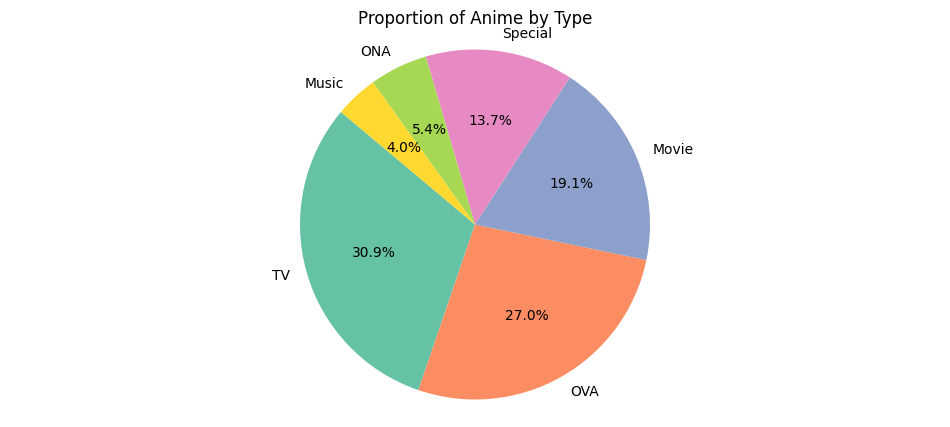

In [84]:
# 16. Proportion of Anime by Type (TV, Movie, OVA, etc.)
# Count anime by type
type_counts = anime_clean['type'].value_counts()

# Plot pie chart
plt.figure(figsize=(12,5))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title('Proportion of Anime by Type')
plt.axis('equal')
plt.show()

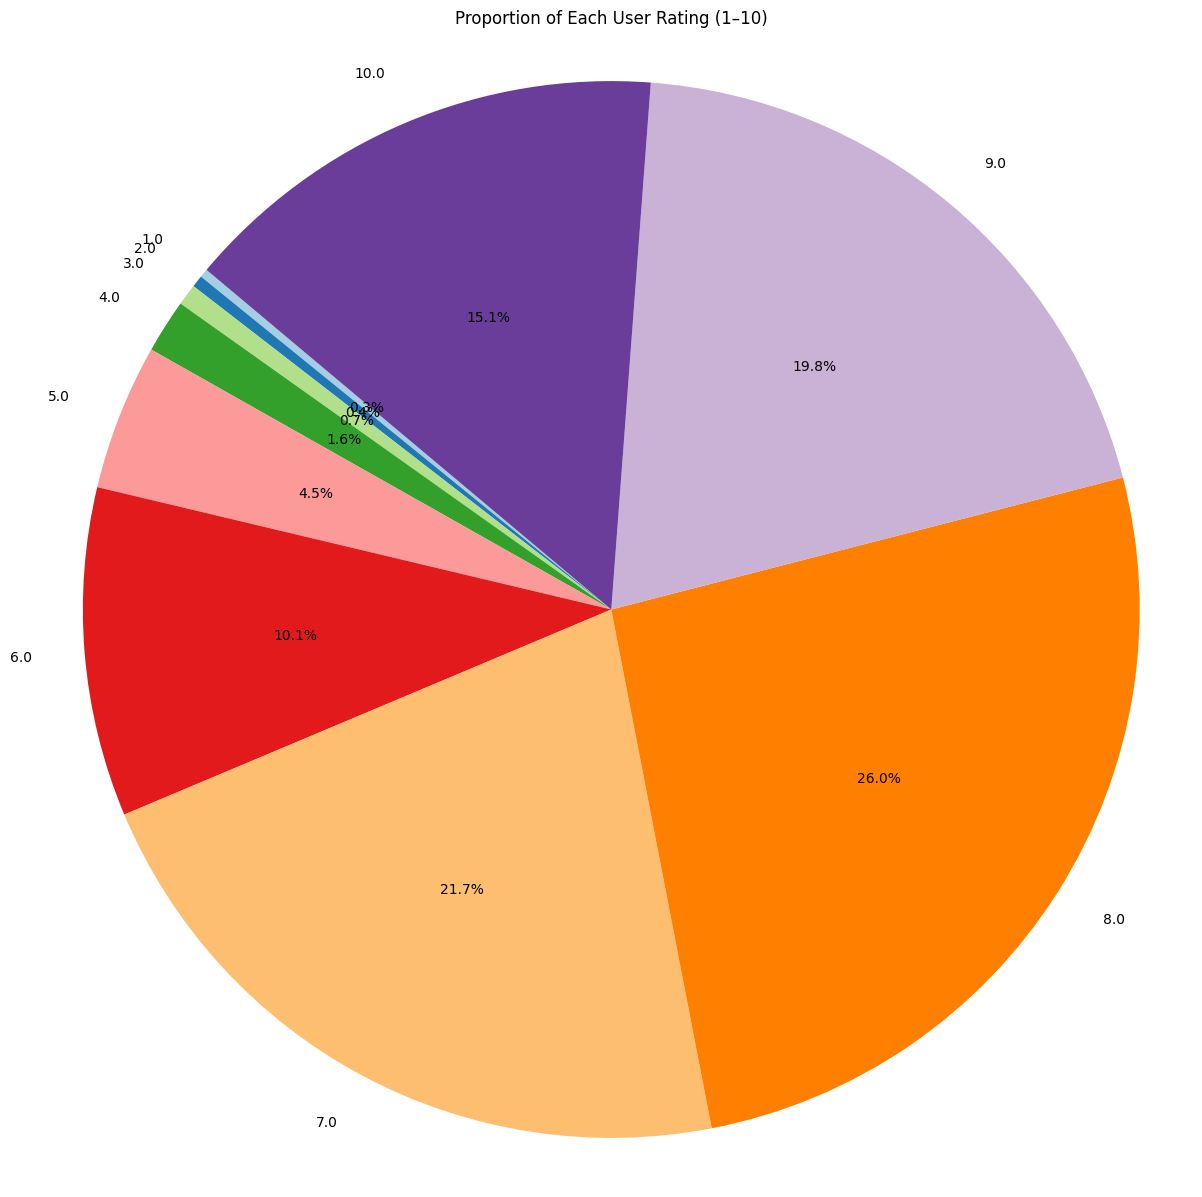

In [89]:
# 17. Proportion of Each Rating Score (Excluding -1)
# Remove -1 ratings
ratings_clean = rating[rating['rating'] != -1]

# Count frequency of each rating score
rating_counts = ratings_clean['rating'].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(15,15))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Each User Rating (1–10)')
plt.axis('equal')
plt.show()